In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [6]:
from google.colab import drive
drive.mount('/content/drive')

# Replace with your Google Drive path
sentiment_path = '/content/drive/MyDrive/ds_prajakta/csv_files/fear_greed.csv'
trader_path = '/content/drive/MyDrive/ds_prajakta/csv_files/historical_data.csv'

sentiment_df = pd.read_csv(sentiment_path)
trader_df = pd.read_csv(trader_path)

sentiment_df.head(), trader_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [11]:
# Clean sentiment dataset
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df.rename(columns={'classification': 'Sentiment'}, inplace=True)

# Clean trader dataset
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'])

# Fix numeric columns
num_cols = ['Execution Price', 'Size Tokens', 'Closed PnL', 'Start Position']
for col in num_cols:
    trader_df[col] = pd.to_numeric(trader_df[col], errors='coerce')

# Drop missing rows
trader_df.dropna(subset=num_cols, inplace=True)

trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [13]:
# Merge on date
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date
trader_df['date_only'] = trader_df['Timestamp IST'].dt.date

merged_df = pd.merge(trader_df, sentiment_df, left_on='date_only', right_on='date', how='left')

merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,timestamp,value,Sentiment,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,2024-12-02


In [15]:
# Average PnL by Sentiment
pnl_sentiment = merged_df.groupby('Sentiment')['Closed PnL'].mean()

# Leverage by Sentiment (Column 'leverage' not found in merged_df)
# leverage_sentiment = merged_df.groupby('Sentiment')['leverage'].mean()

# Volume by Sentiment (Using 'Size Tokens' as a proxy for volume)
volume_sentiment = merged_df.groupby('Sentiment')['Size Tokens'].sum()

pnl_sentiment, volume_sentiment


(Sentiment
 Extreme Fear     34.537862
 Extreme Greed    67.892861
 Fear             54.290400
 Greed            42.743559
 Neutral          34.307718
 Name: Closed PnL, dtype: float64,
 Sentiment
 Extreme Fear     3.586412e+07
 Extreme Greed    3.532260e+08
 Fear             1.850560e+08
 Greed            2.371951e+08
 Neutral          1.651916e+08
 Name: Size Tokens, dtype: float64)

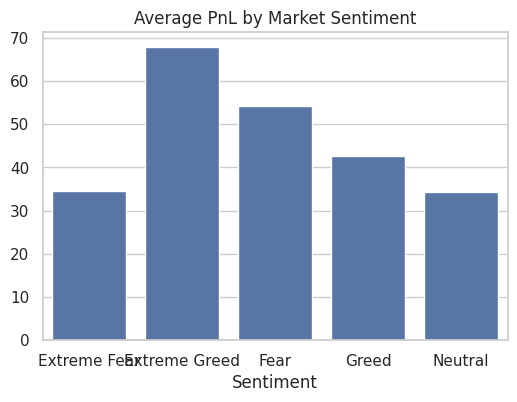

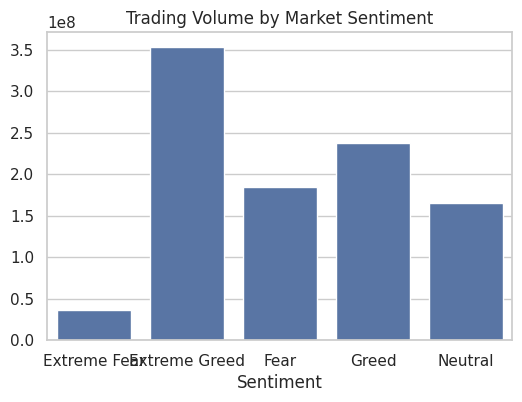

In [17]:
import os

output_dir = '/content/drive/MyDrive/ds_prajakta/outputs'
os.makedirs(output_dir, exist_ok=True)

# PnL Plot
plt.figure(figsize=(6,4))
sns.barplot(x=pnl_sentiment.index, y=pnl_sentiment.values)
plt.title('Average PnL by Market Sentiment')
plt.savefig(f'{output_dir}/pnl_by_sentiment.png')
plt.show()

# Volume Plot
plt.figure(figsize=(6,4))
sns.barplot(x=volume_sentiment.index, y=volume_sentiment.values)
plt.title('Trading Volume by Market Sentiment')
plt.savefig(f'{output_dir}/volume_by_sentiment.png')
plt.show()